In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial as spa
import scipy.stats as stats

## importing data

In [2]:
data_set = np.genfromtxt("/Users/ozlemserifogullari/Documents/ENGR421/HW8/hw08_data_set.csv", delimiter = ",", skip_header = 0)
initial_cent = np.genfromtxt("/Users/ozlemserifogullari/Documents/ENGR421/HW8/hw08_initial_centroids.csv", delimiter = ",", skip_header = 0)

X = data_set


## Data Visialization

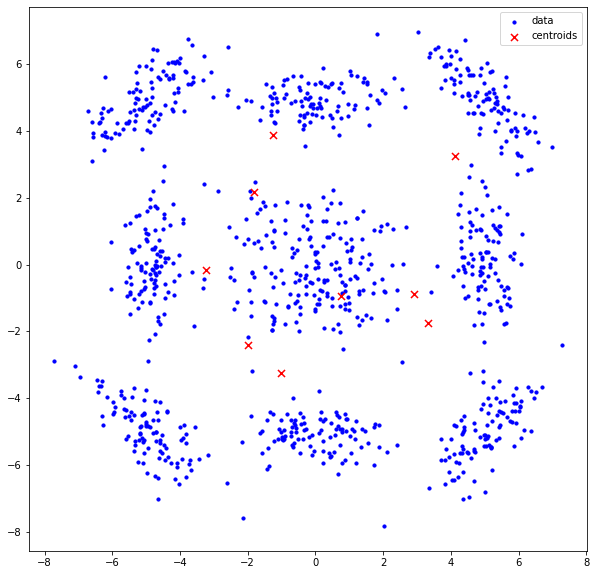

In [3]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], s=10, c='b', marker="o", label='data')
plt.scatter(initial_cent[:,0], initial_cent[:,1], s=50, c='r', marker="x", label='centroids')
plt.legend()
plt.show()


In [4]:
## parameters

N = X.shape[0]
K = initial_cent.shape[0] # number of clusters
D = X.shape[1]

#given parameters
class_means = np.array([[+5.0, +5.0],
                        [-5.0, +5.0],
                        [-5.0, -5.0],
                        [+5.0, -5.0],
                        [+5.0, +0.0],
                        [+0.0, +5.0],
                        [-5.0, +0.0],
                        [+0.0, -5.0],
                        [+0.0, +0.0],])  
class_deviations = np.array([[[+0.8, -0.6], [-0.6, +0.8]],
                             [[+0.8, +0.6], [+0.6, +0.8]],
                             [[+0.8, -0.6], [-0.6, +0.8]],
                             [[+0.8, +0.6], [+0.6, +0.8]],
                             [[+0.2, +0.0], [+0.0, +1.2]],
                             [[+1.2, +0.0], [+0.0, +0.2]],
                             [[+0.2, +0.0], [+0.0, +1.2]],
                             [[+1.2, +0.0], [+0.0, +0.2]],
                             [[+1.6, 0], [0, +1.6]]]) 

In [5]:
## initailize centroids
centroids = initial_cent
## one-k-codings

dist = spa.distance_matrix(centroids, X)
# find the nearest centroid for each data point
memberships = np.argmin(dist, axis = 0) 

one_K_coding = []
for member in memberships:
    k_code = np.zeros(K)
    k_code[member] = 1
    one_K_coding.append(k_code)


In [6]:
# To initialize your EM algorithm, you should take the centroids given in the file named
# hw08_initial_centroids.csv as the initial values for the mean vectors. By
# assigning the data points to the nearest center, estimate the initial covariance matrices and
# prior probabilities in your EM algorithm.

coveriance_matrix = np.zeros((K, D, D))
prior_prob = np.zeros(K)


for k in range(K):
    # find the data points that belong to the k-th cluster
    X_k = X[np.where(np.array(one_K_coding) == 1)[1][k]]
    # estimate the mean vector for the k-th cluster
    centroids[k] = np.mean(X_k, axis=0)
    # estimate the covariance matrix for the k-th cluster
    coveriance_matrix[k] = np.cov(X_k.T)
    # estimate the prior probability of the k-th cluster
    prior_prob[k] = len(X_k)/N
    
h = one_K_coding

In [7]:
def calculate_coveriance_matrix(X, h, means):
    cov_matrix =  []
    for k in range(K):
        m_k = means[k]
        h_k = np.sum(h, axis = 0)[k]
        total = np.sum([h[i][k]*np.matmul(np.transpose((np.reshape(X[i],(1,D))-m_k)), (np.reshape(X[i],(1,D))-m_k)) for i in range (X.shape[0])], axis=0)
        cov = total /h_k
        cov_matrix.append(cov)

def calculate_means(X, h):
    means = np.zeros((K, D))
    for k in range(K):
        X_k = X[np.where(np.array(h) == 1)[1][k]]
        means[k] = np.mean(X_k, axis=0)
    return means

def calculate_prior_prob(h):
    prior_prob = np.zeros(K)
    for k in range(K):
        prior_prob[k] = len(X[np.where(np.array(h) == 1)[1][k]])/N
    return prior_prob

In [8]:
def calculate_h(means,priors, cov_matrix, x):
    for k in range(K):
        for i in range(N):
            mult_gaussian = stats.multivariate_normal.pdf(X[i],np.reshape(means[k], (2,)), cov_matrix[k])
            h[i][k] = priors[k] * mult_gaussian
            h[i][k] /= np.sum(h, axis=1)[i]
    return np.array(h)

In [9]:
def EM_algorithm(X, K, cov_matrix, means, priors, h):
    cov_matrix_new = calculate_coveriance_matrix(X, h)
    means_new = calculate_means(X, h)
    priors_new = calculate_prior_prob(h)
    h_new = calculate_h(means_new, priors_new, cov_matrix_new, X)
    return cov_matrix_new, means_new, priors_new, h_new

In [10]:
iterations = 100
means = calculate_means(X, h)
priors = calculate_prior_prob(h)
cov_matrix = calculate_coveriance_matrix(X, h, means)
for i in range(iterations):
    cov_matrix, means, priors, h = EM_algorithm(X, K, cov_matrix,means, priors, h)

print(means)

TypeError: calculate_coveriance_matrix() missing 1 required positional argument: 'means'